In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

import seaborn as sns
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display


from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

from sklearn.cluster import DBSCAN

In [3]:
plt.rcParams['figure.figsize'] = [6,4]
plt.rcParams['figure.dpi'] = 200
plt.rcParams["axes.grid"] = False

In [4]:
%store -r SouthAfrica_2019

In [5]:
SouthAfrica_2019

,Unnamed: 0_x,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,0,NP Kenjige (USA),4,2,2,7,6*,-,3,233.33,...,129,3,1/26,43.00,4.96,52.0,0,0,1,0
3,3,Aaron Jones (USA),9,9,0,348,95,38.66,521,66.79,...,-,-,-,-,-,-,-,-,1,0
11,11,Akshay Homraj (USA),4,4,0,99,34,24.75,135,73.33,...,-,-,-,-,-,-,-,-,7,0
13,13,Ali Khan (USA),1,1,0,3,3,3.00,11,27.27,...,23,1,1/23,23.00,4.60,30.0,0,0,0,0
18,18,HM Amla (SA),12,12,3,417,108*,46.33,560,74.46,...,-,-,-,-,-,-,-,-,4,0
75,75,Q de Kock (SA),17,17,1,774,121,48.37,773,100.12,...,-,-,-,-,-,-,-,-,19,1
87,87,JP Duminy (SA),7,5,1,101,45,25.25,93,108.60,...,98,2,1/15,49.00,6.12,48.0,0,0,5,0
88,88,F du Plessis (SA),19,17,5,814,112*,67.83,917,88.76,...,-,-,-,-,-,-,-,-,16,0
89,89,SA Edwards (NED),2,1,1,44,44*,-,47,93.61,...,-,-,-,-,-,-,-,-,0,0
111,111,K Gore (USA),7,7,2,112,31,22.40,171,65.49,...,208,9,4/20,23.11,4.16,33.3,1,0,0,0


In [6]:
SouthAfrica_2019=SouthAfrica_2019.reset_index()

In [7]:
SouthAfrica_2019

,index,Unnamed: 0_x,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,0,0,NP Kenjige (USA),4,2,2,7,6*,-,3,...,129,3,1/26,43.00,4.96,52.0,0,0,1,0
1,3,3,Aaron Jones (USA),9,9,0,348,95,38.66,521,...,-,-,-,-,-,-,-,-,1,0
2,11,11,Akshay Homraj (USA),4,4,0,99,34,24.75,135,...,-,-,-,-,-,-,-,-,7,0
3,13,13,Ali Khan (USA),1,1,0,3,3,3.00,11,...,23,1,1/23,23.00,4.60,30.0,0,0,0,0
4,18,18,HM Amla (SA),12,12,3,417,108*,46.33,560,...,-,-,-,-,-,-,-,-,4,0
5,75,75,Q de Kock (SA),17,17,1,774,121,48.37,773,...,-,-,-,-,-,-,-,-,19,1
6,87,87,JP Duminy (SA),7,5,1,101,45,25.25,93,...,98,2,1/15,49.00,6.12,48.0,0,0,5,0
7,88,88,F du Plessis (SA),19,17,5,814,112*,67.83,917,...,-,-,-,-,-,-,-,-,16,0
8,89,89,SA Edwards (NED),2,1,1,44,44*,-,47,...,-,-,-,-,-,-,-,-,0,0
9,111,111,K Gore (USA),7,7,2,112,31,22.40,171,...,208,9,4/20,23.11,4.16,33.3,1,0,0,0


In [8]:
SouthAfrica_2019.drop(['index','Unnamed: 0_x'],inplace=True,axis=1)

In [9]:
SouthAfrica_2019

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,NP Kenjige (USA),4,2,2,7,6*,-,3,233.33,0,...,129,3,1/26,43.00,4.96,52.0,0,0,1,0
1,Aaron Jones (USA),9,9,0,348,95,38.66,521,66.79,0,...,-,-,-,-,-,-,-,-,1,0
2,Akshay Homraj (USA),4,4,0,99,34,24.75,135,73.33,0,...,-,-,-,-,-,-,-,-,7,0
3,Ali Khan (USA),1,1,0,3,3,3.00,11,27.27,0,...,23,1,1/23,23.00,4.60,30.0,0,0,0,0
4,HM Amla (SA),12,12,3,417,108*,46.33,560,74.46,1,...,-,-,-,-,-,-,-,-,4,0
5,Q de Kock (SA),17,17,1,774,121,48.37,773,100.12,1,...,-,-,-,-,-,-,-,-,19,1
6,JP Duminy (SA),7,5,1,101,45,25.25,93,108.60,0,...,98,2,1/15,49.00,6.12,48.0,0,0,5,0
7,F du Plessis (SA),19,17,5,814,112*,67.83,917,88.76,2,...,-,-,-,-,-,-,-,-,16,0
8,SA Edwards (NED),2,1,1,44,44*,-,47,93.61,0,...,-,-,-,-,-,-,-,-,0,0
9,K Gore (USA),7,7,2,112,31,22.40,171,65.49,0,...,208,9,4/20,23.11,4.16,33.3,1,0,0,0


In [10]:
SouthAfrica_2019_players =SouthAfrica_2019.copy()

In [11]:
SouthAfrica_2019_players.drop('Player',axis=1,inplace=True)

In [12]:
SouthAfrica_2019_players.HS=SouthAfrica_2019_players.HS.str.extract('(\d+)')
SouthAfrica_2019_players['HS'].fillna(value=0, inplace=True)


In [13]:
SouthAfrica_2019_players

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,4,2,2,7,6,-,3,233.33,0,0,...,129,3,1/26,43.00,4.96,52.0,0,0,1,0
1,9,9,0,348,95,38.66,521,66.79,0,3,...,-,-,-,-,-,-,-,-,1,0
2,4,4,0,99,34,24.75,135,73.33,0,0,...,-,-,-,-,-,-,-,-,7,0
3,1,1,0,3,3,3.00,11,27.27,0,0,...,23,1,1/23,23.00,4.60,30.0,0,0,0,0
4,12,12,3,417,108,46.33,560,74.46,1,3,...,-,-,-,-,-,-,-,-,4,0
5,17,17,1,774,121,48.37,773,100.12,1,7,...,-,-,-,-,-,-,-,-,19,1
6,7,5,1,101,45,25.25,93,108.60,0,0,...,98,2,1/15,49.00,6.12,48.0,0,0,5,0
7,19,17,5,814,112,67.83,917,88.76,2,6,...,-,-,-,-,-,-,-,-,16,0
8,2,1,1,44,44,-,47,93.61,0,0,...,-,-,-,-,-,-,-,-,0,0
9,7,7,2,112,31,22.40,171,65.49,0,0,...,208,9,4/20,23.11,4.16,33.3,1,0,0,0


In [14]:
SouthAfrica_2019_players.replace("-",0,inplace=True)

In [15]:
SouthAfrica_2019_players.drop('BBI',axis=1,inplace=True)

In [16]:
scaler = StandardScaler()

SouthAfrica_2019_players_scaled = pd.DataFrame(scaler.fit_transform(SouthAfrica_2019_players),columns=SouthAfrica_2019_players.columns)
SouthAfrica_2019_players_scaled.shape
SouthAfrica_2019_players_scaled.head()

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,-0.724595,-0.786924,0.566667,-0.656183,-0.960775,-1.089494,-0.727901,3.656374,-0.263752,-0.459041,...,-0.614508,-0.078781,-0.312813,0.847995,0.538254,0.999446,-0.372678,-0.158114,-0.586979,-0.280976
1,0.265685,0.803549,-0.800000,1.041466,1.667312,1.037116,1.495799,-0.104366,-0.263752,1.201606,...,-0.614508,-0.807233,-0.782033,-0.999551,-1.485397,-1.047057,-0.372678,-0.158114,-0.586979,-0.280976
2,-0.724595,-0.332503,-0.800000,-0.198166,-0.133961,0.271954,-0.161244,0.043318,-0.263752,-0.459041,...,-0.614508,-0.807233,-0.782033,-0.999551,-1.485397,-1.047057,-0.372678,-0.158114,0.932988,-0.280976
3,-1.318764,-1.014134,-0.800000,-0.676097,-1.049362,-0.924470,-0.693558,-0.996790,-0.263752,-0.459041,...,-0.254582,-0.677354,-0.625626,-0.011328,0.391376,0.133618,-0.372678,-0.158114,-0.840307,-0.280976
4,0.859853,1.485181,1.250000,1.384978,2.051190,1.459027,1.663220,0.068835,2.439708,1.201606,...,-0.614508,-0.807233,-0.782033,-0.999551,-1.485397,-1.047057,-0.372678,-0.158114,0.173004,-0.280976


In [17]:
SouthAfrica_2019_players_scaled.describe()

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
count,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,41.000000,4.100000e+01,4.100000e+01,4.100000e+01,...,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,41.000000
mean,8.665155e-17,-5.415722e-17,5.144936e-17,-1.083144e-17,-8.800548e-17,5.009543e-17,0.000000,-2.288143e-16,-1.083144e-16,6.498866e-17,...,4.874150e-17,3.046344e-18,-7.378921e-17,4.603364e-17,3.032804e-16,-2.978647e-17,-8.123583e-18,-9.477514e-18,2.707861e-17,0.000000
std,1.012423e+00,1.012423e+00,1.012423e+00,1.012423e+00,1.012423e+00,1.012423e+00,1.012423,1.012423e+00,1.012423e+00,1.012423e+00,...,1.012423e+00,1.012423e+00,1.012423e+00,1.012423e+00,1.012423e+00,1.012423e+00,1.012423e+00,1.012423e+00,1.012423e+00,1.012423
min,-1.318764e+00,-1.241345e+00,-8.000000e-01,-6.910320e-01,-1.137949e+00,-1.089494e+00,-0.740780,-1.612590e+00,-2.637522e-01,-4.590405e-01,...,-6.145081e-01,-8.072329e-01,-7.820327e-01,-9.995506e-01,-1.485397e+00,-1.047057e+00,-3.726780e-01,-1.581139e-01,-8.403070e-01,-0.280976
25%,-7.245954e-01,-7.869240e-01,-8.000000e-01,-6.362691e-01,-9.017169e-01,-8.881649e-01,-0.646337,-3.949907e-01,-2.637522e-01,-4.590405e-01,...,-6.145081e-01,-8.072329e-01,-7.820327e-01,-9.995506e-01,-1.485397e+00,-1.047057e+00,-3.726780e-01,-1.581139e-01,-5.869792e-01,-0.280976
50%,-3.284833e-01,-1.052927e-01,-1.166667e-01,-3.873470e-01,-1.339611e-01,-1.543579e-01,-0.435987,4.105995e-02,-2.637522e-01,-4.590405e-01,...,-6.145081e-01,-2.368948e-01,-3.128131e-01,-1.058540e-01,3.995358e-01,7.851971e-02,-3.726780e-01,-1.581139e-01,-3.336513e-01,-0.280976
75%,2.656850e-01,8.035492e-01,5.666667e-01,2.150444e-01,3.385039e-01,4.232264e-01,0.396828,3.675898e-01,-2.637522e-01,9.450834e-02,...,4.652704e-01,1.527421e-01,3.128131e-01,6.331644e-01,7.463309e-01,5.271763e-01,-3.726780e-01,-1.581139e-01,1.730044e-01,-0.280976
max,2.246246e+00,2.621233e+00,2.616667e+00,3.361419e+00,2.435068e+00,2.968448e+00,3.195770,3.656374e+00,5.143168e+00,3.415801e+00,...,3.344680e+00,3.546536e+00,2.971724e+00,3.554865e+00,1.252244e+00,3.911779e+00,2.683282e+00,6.324555e+00,3.972922e+00,3.559026


In [18]:
X =  SouthAfrica_2019_players_scaled.iloc[:,:].values

In [19]:
X

array([[-0.72459541, -0.78692403,  0.56666667, ..., -0.15811388,
        -0.58697918, -0.28097574],
       [ 0.26568498,  0.80354919, -0.8       , ..., -0.15811388,
        -0.58697918, -0.28097574],
       [-0.72459541, -0.33250311, -0.8       , ..., -0.15811388,
         0.93298795, -0.28097574],
       ...,
       [-0.52653933, -0.10529265, -0.11666667, ..., -0.15811388,
        -0.58697918, -0.28097574],
       [ 2.04818968,  1.93960149,  2.61666667, ..., -0.15811388,
         1.43964366, -0.28097574],
       [-0.52653933, -0.78692403, -0.8       , ..., -0.15811388,
        -0.58697918, -0.28097574]])

In [20]:
"""from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)"""

'from sklearn.cross_validation import train_test_split\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)'

In [21]:
"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)"""

'from sklearn.preprocessing import StandardScaler\nsc_X = StandardScaler()\nX_train = sc_X.fit_transform(X_train)\nX_test = sc_X.transform(X_test)\nsc_y = StandardScaler()\ny_train = sc_y.fit_transform(y_train)'

In [22]:
np.any(np.isnan(SouthAfrica_2019_players_scaled))

False

In [23]:
SouthAfrica_2019_players_scaled

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,-0.724595,-0.786924,0.566667,-0.656183,-0.960775,-1.089494,-0.727901,3.656374,-0.263752,-0.459041,...,-0.614508,-0.078781,-0.312813,0.847995,0.538254,0.999446,-0.372678,-0.158114,-0.586979,-0.280976
1,0.265685,0.803549,-0.800000,1.041466,1.667312,1.037116,1.495799,-0.104366,-0.263752,1.201606,...,-0.614508,-0.807233,-0.782033,-0.999551,-1.485397,-1.047057,-0.372678,-0.158114,-0.586979,-0.280976
2,-0.724595,-0.332503,-0.800000,-0.198166,-0.133961,0.271954,-0.161244,0.043318,-0.263752,-0.459041,...,-0.614508,-0.807233,-0.782033,-0.999551,-1.485397,-1.047057,-0.372678,-0.158114,0.932988,-0.280976
3,-1.318764,-1.014134,-0.800000,-0.676097,-1.049362,-0.924470,-0.693558,-0.996790,-0.263752,-0.459041,...,-0.254582,-0.677354,-0.625626,-0.011328,0.391376,0.133618,-0.372678,-0.158114,-0.840307,-0.280976
4,0.859853,1.485181,1.250000,1.384978,2.051190,1.459027,1.663220,0.068835,2.439708,1.201606,...,-0.614508,-0.807233,-0.782033,-0.999551,-1.485397,-1.047057,-0.372678,-0.158114,0.173004,-0.280976
5,1.850134,2.621233,-0.116667,3.162282,2.435068,1.571244,2.577599,0.648279,2.439708,3.415801,...,-0.614508,-0.807233,-0.782033,-0.999551,-1.485397,-1.047057,-0.372678,-0.158114,3.972922,3.559026
6,-0.130427,-0.105293,-0.116667,-0.188209,0.190859,0.299458,-0.341544,0.839771,-0.263752,-0.459041,...,-0.614508,-0.253836,-0.469220,1.105792,1.011527,0.842023,-0.372678,-0.158114,0.426332,-0.280976
7,2.246246,2.621233,2.616667,3.361419,2.169306,2.641700,3.195770,0.391752,5.143168,2.862253,...,-0.614508,-0.807233,-0.782033,-0.999551,-1.485397,-1.047057,-0.372678,-0.158114,3.212939,-0.280976
8,-1.120708,-1.014134,-0.116667,-0.471981,0.161330,-1.089494,-0.539015,0.501273,-0.263752,-0.459041,...,-0.614508,-0.807233,-0.782033,-0.999551,-1.485397,-1.047057,-0.372678,-0.158114,-0.840307,-0.280976
9,-0.130427,0.349128,0.566667,-0.133447,-0.222548,0.142685,-0.006701,-0.133722,-0.263752,-0.459041,...,1.545049,0.367325,0.625626,-0.006602,0.211858,0.263492,2.683282,-0.158114,-0.840307,-0.280976


In [24]:
np.all(np.isfinite(SouthAfrica_2019_players_scaled))

True

K:\4th year\my research practical\jupyter\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


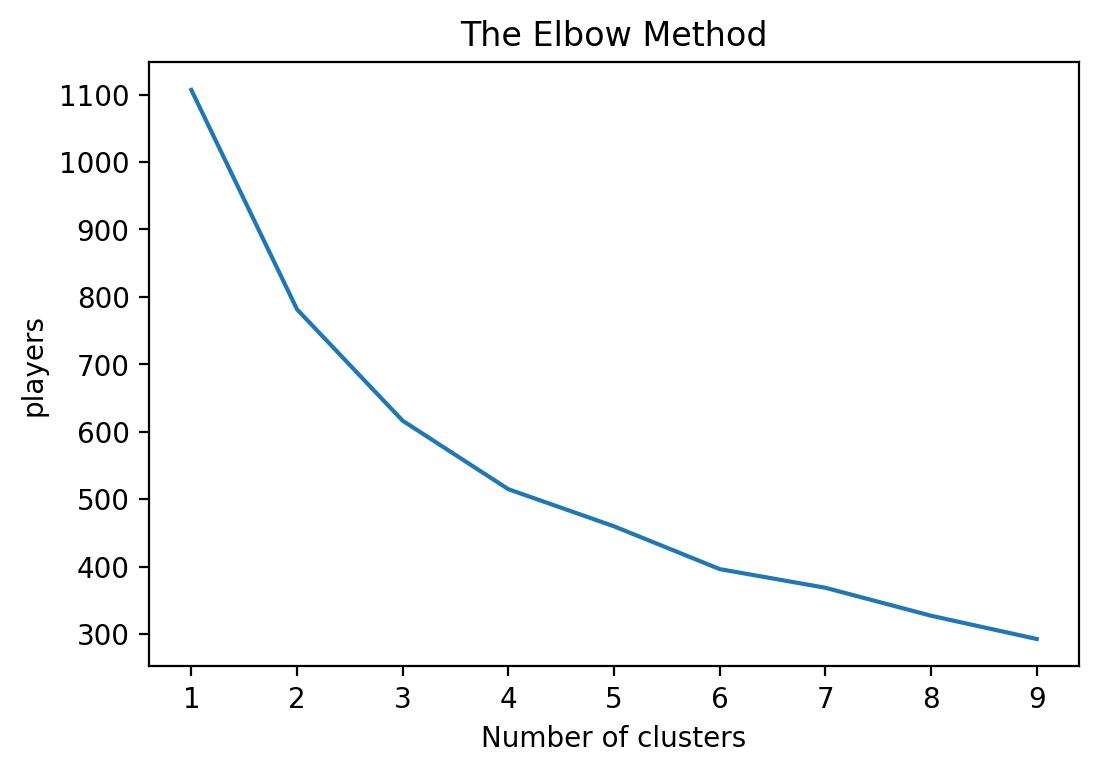

In [25]:
from sklearn.cluster import KMeans
players = []
for i in range(1,10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    players.append(kmeans.inertia_)
plt.plot(range(1, 10), players)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('players')
plt.show()

In [26]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)


In [27]:
y_kmeans

array([0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0])

In [28]:
kmeans.cluster_centers_

array([[-0.37508468, -0.29908981, -0.31764706, -0.29700296, -0.23991837,
        -0.26003801, -0.28220146, -0.05086707, -0.26375219, -0.29623203,
        -0.06063749, -0.29043794, -0.25371   ,  0.03703295, -0.37508468,
        -0.13110699, -0.16793512, -0.07461884, -0.1666406 , -0.15180635,
         0.09438105,  0.12953963,  0.09021071, -0.1030345 ,  0.03255286,
        -0.31129886, -0.05509328],
       [ 1.75110557,  2.16681195,  1.59166667,  2.63083307,  2.08071884,
         2.16010477,  2.54432928,  0.33625787,  2.43970775,  2.72386539,
        -0.30925122,  2.49740132,  2.14499244, -0.54210246,  1.75110557,
        -0.95966978, -0.79453604, -0.61450811, -0.80723288, -0.78203272,
        -0.99955063, -1.4853975 , -1.04705741, -0.372678  , -0.15811388,
         2.19962723,  0.67902471],
       [ 1.9161523 ,  0.50060191,  1.47777778, -0.14174392, -0.05521695,
         0.06695774, -0.1941558 ,  0.12814964, -0.26375219, -0.27452423,
         1.0995599 , -0.03823847,  0.01539008,  0.3030

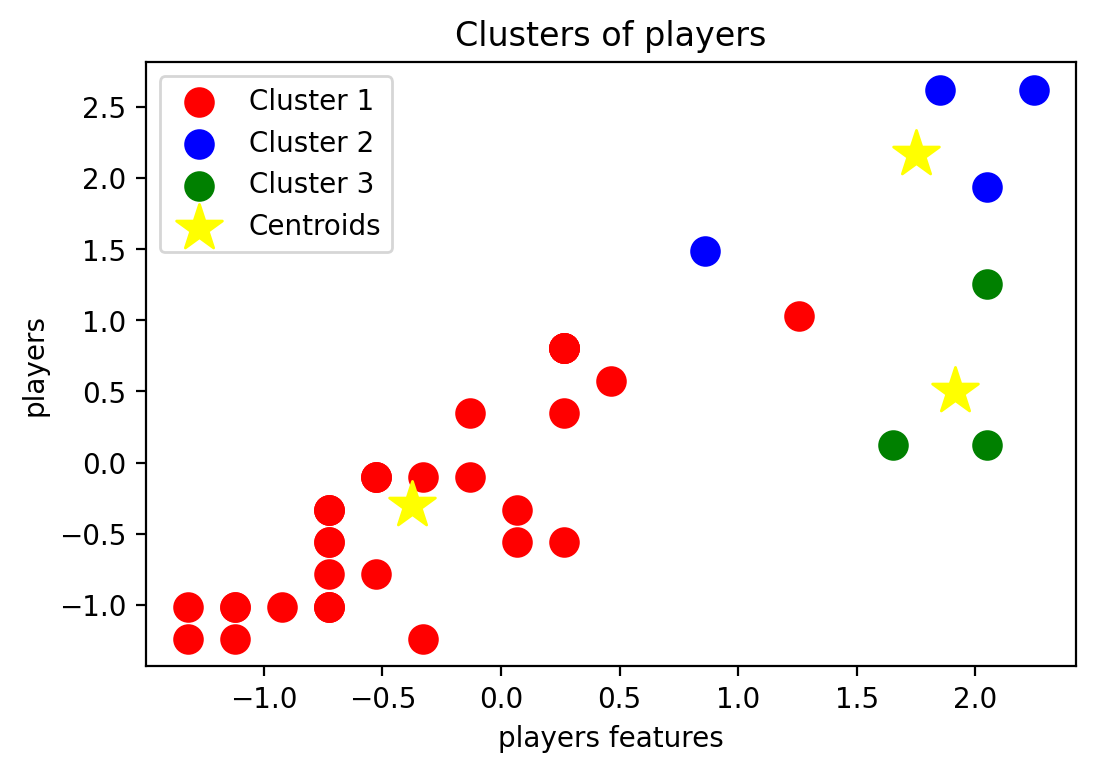

In [29]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300,marker='*', c = 'yellow', label = 'Centroids')
plt.title('Clusters of players')
plt.xlabel('players features')
plt.ylabel('players')
plt.legend()
plt.show()

In [30]:
SouthAfrica_2019

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,NP Kenjige (USA),4,2,2,7,6*,-,3,233.33,0,...,129,3,1/26,43.00,4.96,52.0,0,0,1,0
1,Aaron Jones (USA),9,9,0,348,95,38.66,521,66.79,0,...,-,-,-,-,-,-,-,-,1,0
2,Akshay Homraj (USA),4,4,0,99,34,24.75,135,73.33,0,...,-,-,-,-,-,-,-,-,7,0
3,Ali Khan (USA),1,1,0,3,3,3.00,11,27.27,0,...,23,1,1/23,23.00,4.60,30.0,0,0,0,0
4,HM Amla (SA),12,12,3,417,108*,46.33,560,74.46,1,...,-,-,-,-,-,-,-,-,4,0
5,Q de Kock (SA),17,17,1,774,121,48.37,773,100.12,1,...,-,-,-,-,-,-,-,-,19,1
6,JP Duminy (SA),7,5,1,101,45,25.25,93,108.60,0,...,98,2,1/15,49.00,6.12,48.0,0,0,5,0
7,F du Plessis (SA),19,17,5,814,112*,67.83,917,88.76,2,...,-,-,-,-,-,-,-,-,16,0
8,SA Edwards (NED),2,1,1,44,44*,-,47,93.61,0,...,-,-,-,-,-,-,-,-,0,0
9,K Gore (USA),7,7,2,112,31,22.40,171,65.49,0,...,208,9,4/20,23.11,4.16,33.3,1,0,0,0


In [31]:
SouthAfrica_2019["cluster"] = y_kmeans

In [32]:
SouthAfrica_2019

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St,cluster
0,NP Kenjige (USA),4,2,2,7,6*,-,3,233.33,0,...,3,1/26,43.00,4.96,52.0,0,0,1,0,0
1,Aaron Jones (USA),9,9,0,348,95,38.66,521,66.79,0,...,-,-,-,-,-,-,-,1,0,0
2,Akshay Homraj (USA),4,4,0,99,34,24.75,135,73.33,0,...,-,-,-,-,-,-,-,7,0,0
3,Ali Khan (USA),1,1,0,3,3,3.00,11,27.27,0,...,1,1/23,23.00,4.60,30.0,0,0,0,0,0
4,HM Amla (SA),12,12,3,417,108*,46.33,560,74.46,1,...,-,-,-,-,-,-,-,4,0,1
5,Q de Kock (SA),17,17,1,774,121,48.37,773,100.12,1,...,-,-,-,-,-,-,-,19,1,1
6,JP Duminy (SA),7,5,1,101,45,25.25,93,108.60,0,...,2,1/15,49.00,6.12,48.0,0,0,5,0,0
7,F du Plessis (SA),19,17,5,814,112*,67.83,917,88.76,2,...,-,-,-,-,-,-,-,16,0,1
8,SA Edwards (NED),2,1,1,44,44*,-,47,93.61,0,...,-,-,-,-,-,-,-,0,0,0
9,K Gore (USA),7,7,2,112,31,22.40,171,65.49,0,...,9,4/20,23.11,4.16,33.3,1,0,0,0,0


In [33]:
SouthAfrica_2019['cluster'].value_counts()

0    34
1     4
2     3
Name: cluster, dtype: int64

In [34]:
SouthAfrica_Cluster_2019 = np.array([34,4,3])

In [35]:
SouthAfrica_Cluster_2019

array([34,  4,  3])

In [36]:
%store SouthAfrica_Cluster_2019

Stored 'SouthAfrica_Cluster_2019' (ndarray)


In [37]:
SouthAfrica_2019_players_scaled.insert(0, 'Player', SouthAfrica_2019.Player)

In [38]:
SouthAfrica_2019_players_scaled

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,NP Kenjige (USA),-0.724595,-0.786924,0.566667,-0.656183,-0.960775,-1.089494,-0.727901,3.656374,-0.263752,...,-0.614508,-0.078781,-0.312813,0.847995,0.538254,0.999446,-0.372678,-0.158114,-0.586979,-0.280976
1,Aaron Jones (USA),0.265685,0.803549,-0.800000,1.041466,1.667312,1.037116,1.495799,-0.104366,-0.263752,...,-0.614508,-0.807233,-0.782033,-0.999551,-1.485397,-1.047057,-0.372678,-0.158114,-0.586979,-0.280976
2,Akshay Homraj (USA),-0.724595,-0.332503,-0.800000,-0.198166,-0.133961,0.271954,-0.161244,0.043318,-0.263752,...,-0.614508,-0.807233,-0.782033,-0.999551,-1.485397,-1.047057,-0.372678,-0.158114,0.932988,-0.280976
3,Ali Khan (USA),-1.318764,-1.014134,-0.800000,-0.676097,-1.049362,-0.924470,-0.693558,-0.996790,-0.263752,...,-0.254582,-0.677354,-0.625626,-0.011328,0.391376,0.133618,-0.372678,-0.158114,-0.840307,-0.280976
4,HM Amla (SA),0.859853,1.485181,1.250000,1.384978,2.051190,1.459027,1.663220,0.068835,2.439708,...,-0.614508,-0.807233,-0.782033,-0.999551,-1.485397,-1.047057,-0.372678,-0.158114,0.173004,-0.280976
5,Q de Kock (SA),1.850134,2.621233,-0.116667,3.162282,2.435068,1.571244,2.577599,0.648279,2.439708,...,-0.614508,-0.807233,-0.782033,-0.999551,-1.485397,-1.047057,-0.372678,-0.158114,3.972922,3.559026
6,JP Duminy (SA),-0.130427,-0.105293,-0.116667,-0.188209,0.190859,0.299458,-0.341544,0.839771,-0.263752,...,-0.614508,-0.253836,-0.469220,1.105792,1.011527,0.842023,-0.372678,-0.158114,0.426332,-0.280976
7,F du Plessis (SA),2.246246,2.621233,2.616667,3.361419,2.169306,2.641700,3.195770,0.391752,5.143168,...,-0.614508,-0.807233,-0.782033,-0.999551,-1.485397,-1.047057,-0.372678,-0.158114,3.212939,-0.280976
8,SA Edwards (NED),-1.120708,-1.014134,-0.116667,-0.471981,0.161330,-1.089494,-0.539015,0.501273,-0.263752,...,-0.614508,-0.807233,-0.782033,-0.999551,-1.485397,-1.047057,-0.372678,-0.158114,-0.840307,-0.280976
9,K Gore (USA),-0.130427,0.349128,0.566667,-0.133447,-0.222548,0.142685,-0.006701,-0.133722,-0.263752,...,1.545049,0.367325,0.625626,-0.006602,0.211858,0.263492,2.683282,-0.158114,-0.840307,-0.280976


In [39]:
SouthAfrica_2019_players_scaled[['Player','Ave_x','Ave_y']]

,Player,Ave_x,Ave_y
0,NP Kenjige (USA),-1.089494,0.847995
1,Aaron Jones (USA),1.037116,-0.999551
2,Akshay Homraj (USA),0.271954,-0.999551
3,Ali Khan (USA),-0.924470,-0.011328
4,HM Amla (SA),1.459027,-0.999551
5,Q de Kock (SA),1.571244,-0.999551
6,JP Duminy (SA),0.299458,1.105792
7,F du Plessis (SA),2.641700,-0.999551
8,SA Edwards (NED),-1.089494,-0.999551
9,K Gore (USA),0.142685,-0.006602


In [40]:
SouthAfrica_2019_Ave=SouthAfrica_2019_players_scaled.mean()

In [41]:
SouthAfrica_2019_Ave

Mat_x           8.665155e-17
Inns_x         -5.415722e-17
NO              5.144936e-17
Runs_x         -1.083144e-17
HS             -8.800548e-17
Ave_x           5.009543e-17
BF              0.000000e+00
SR_x           -2.288143e-16
100            -1.083144e-16
50              6.498866e-17
0              -2.707861e-17
4s              7.582011e-17
6s              2.166289e-17
Unnamed: 0_y   -6.498866e-17
Mat_y           8.665155e-17
Inns_y         -6.769653e-18
Overs           1.682259e-16
Mdns            4.874150e-17
Runs_y          3.046344e-18
Wkts           -7.378921e-17
Ave_y           4.603364e-17
Econ            3.032804e-16
SR_y           -2.978647e-17
4              -8.123583e-18
5              -9.477514e-18
Ct              2.707861e-17
St              0.000000e+00
dtype: float64

In [42]:
SouthAfrica_Ave_2019 =SouthAfrica_2019_Ave[['Ave_x','Ave_y']]

In [43]:
SouthAfrica_Ave_2019

Ave_x    5.009543e-17
Ave_y    4.603364e-17
dtype: float64

In [44]:
SouthAfrica_Ave_2019 = np.array([SouthAfrica_Ave_2019.Ave_x, SouthAfrica_Ave_2019.Ave_y])

In [45]:
SouthAfrica_Ave_2019

array([5.00954292e-17, 4.60336376e-17])

In [46]:
%store SouthAfrica_Ave_2019

Stored 'SouthAfrica_Ave_2019' (ndarray)


In [47]:
SouthAfrica_2019

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St,cluster
0,NP Kenjige (USA),4,2,2,7,6*,-,3,233.33,0,...,3,1/26,43.00,4.96,52.0,0,0,1,0,0
1,Aaron Jones (USA),9,9,0,348,95,38.66,521,66.79,0,...,-,-,-,-,-,-,-,1,0,0
2,Akshay Homraj (USA),4,4,0,99,34,24.75,135,73.33,0,...,-,-,-,-,-,-,-,7,0,0
3,Ali Khan (USA),1,1,0,3,3,3.00,11,27.27,0,...,1,1/23,23.00,4.60,30.0,0,0,0,0,0
4,HM Amla (SA),12,12,3,417,108*,46.33,560,74.46,1,...,-,-,-,-,-,-,-,4,0,1
5,Q de Kock (SA),17,17,1,774,121,48.37,773,100.12,1,...,-,-,-,-,-,-,-,19,1,1
6,JP Duminy (SA),7,5,1,101,45,25.25,93,108.60,0,...,2,1/15,49.00,6.12,48.0,0,0,5,0,0
7,F du Plessis (SA),19,17,5,814,112*,67.83,917,88.76,2,...,-,-,-,-,-,-,-,16,0,1
8,SA Edwards (NED),2,1,1,44,44*,-,47,93.61,0,...,-,-,-,-,-,-,-,0,0,0
9,K Gore (USA),7,7,2,112,31,22.40,171,65.49,0,...,9,4/20,23.11,4.16,33.3,1,0,0,0,0
